# L(2,1) Welsh Powell Implementation

Emma's pseudocode:

- Let C be the set of nodes that are currently in the running for being colored
- Begin with all nodes in C
- Choose highest degree node, color it the first color
- Remove that node and the 1st and 2nd degree adjacencies of that node from C
- Choose next highest degree node from C, remove 1st and 2nd adjacencies
- Continue until C = emptyset
- Add the 2nd degree adjacencies back into C
- Repeat the process with the next color
- After this one, also add the 1st degree adjacencies from the first color back in
- Continue until all nodes are colored

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

In [64]:
G = nx.bull_graph() #sample graph to use
colorings = {}
color = 0
node_status = {} #structure is -- node:["prev1st","curr1st","curr2nd"]
for node in G.nodes():
    node_status[node] = []


orderFull = sorted(G.degree, key=lambda x: x[1], reverse=True) #order vertices max to min degree
#get just vertices in order. trusting sam that this is necessary, will question it later
order = []
for i in range(len(orderFull)):
    order.append(orderFull[i][0])

graph_not_colored = True
while graph_not_colored:
        
    curr_color_done = False
    while True: #keep going until curr_color_done. could make this more elegant

        center_try = 0 #find current center. could also make this more elegant
        while True: 
            if center_try == len(order):
                curr_color_done = True
                break
            if node_status[center_try] == [] and not center_try in colorings:
                center = center_try
                break
            center_try += 1

        if curr_color_done:
            break

        colorings[center] = color #color max node current color

        # add 1st adjacencies of center to node_status
        adj_1 = list(G.neighbors(center))
        for node in adj_1:
            node_status[node].append("curr1st")
        #add 2nd adjacencies of center to node_status
        for node in adj_1:
            for adj_2 in list(G.neighbors(node)):
                node_status[adj_2].append("curr2nd")

    #update node_status labels for next round
    for node in node_status:
        #TODO: combine these into one for loop rather than two
        node_status[node][:] = [x for x in node_status[node] if x!="curr2nd" or "prev1st"] #remove curr2nd and prev1st labels
        node_status[node][:] = ["prev1st" for x in node_status[node] if x=="curr1st"] #change curr1st labels to prev1st
    
    color += 1

    if len(colorings) == len(order):
        print("Exiting")
        graph_not_colored = False

print(colorings)

Exiting
{0: 0, 3: 1, 4: 1, 1: 3, 2: 5}


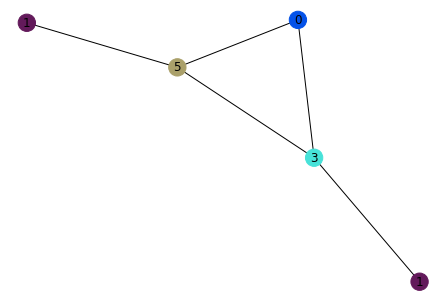

In [65]:
nodeList = list(G.nodes())
final_colorings = {}
for node in nodeList:
    final_colorings.update({node: colorings[node]})
        
color_options = []
labels = range(100)

for i in range(100):
    color_options.append('#%06X' % randint(0, 0xAAAAAA))

color_map = []
label_dict = {}

for vertex in final_colorings:
    color_map.append(color_options[colorings[vertex]])
    label_dict.update({vertex: labels[colorings[vertex]]})
    
nx.draw(G, node_color = color_map, labels = label_dict, with_labels = True)
plt.show()

In [3]:
#UNSURE ABOUT: multiple instances of curr2nd and what that means for the next round. Need whiteboard and brain.